In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
trials, choices, win, loss = np.loadtxt('WSLS.csv', unpack=True,delimiter=',')

Text(0.5, 0, 'Trial')

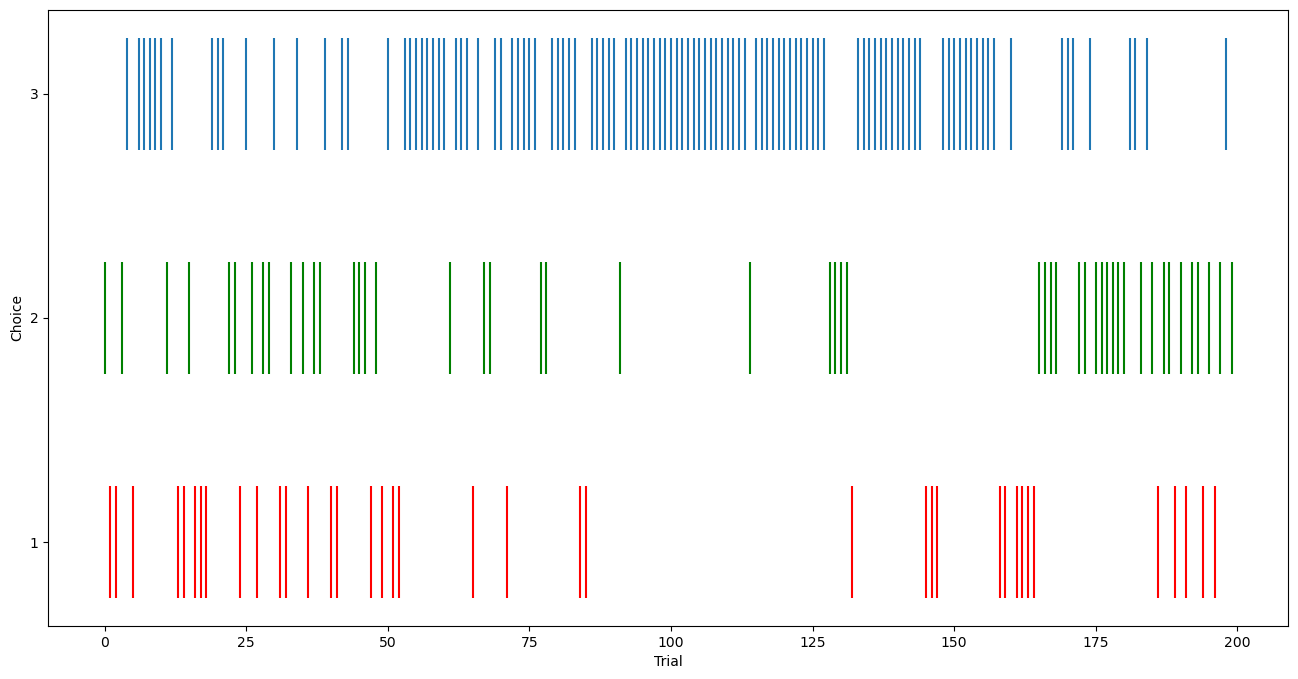

In [71]:
plt.figure(figsize=(16,8))

for i in range(0,len(choices)):
    
    if choices[i] == 1:
        plt.vlines(i,0.75,1.25,color='r')

    if choices[i] == 2:
        plt.vlines(i,1.75,2.25,color='g')
        
    if choices[i] == 3:
        plt.vlines(i,2.75,3.25)

plt.yticks([1,2,3]);
plt.ylabel('Choice')
plt.xlabel('Trial')

In [16]:
np.unique(choices, return_counts=True)

(array([1., 2., 3.]), array([ 38,  50, 112]))

In [34]:
rewards = []

for i,j in zip(win,loss):
    
    if i == 0 and j == 0:
        rewards.append(0)
        
    if i == 1 and j == 0:
        rewards.append(1)
        
    if i == 0 and j == 1:
        rewards.append(-1)
        
    if i == 1 and j == 1:
        rewards.append(0)

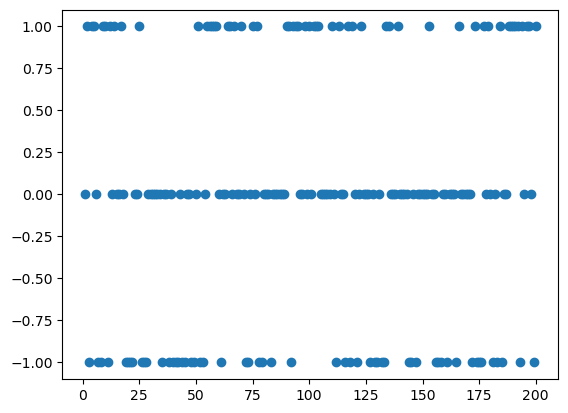

In [35]:
plt.scatter(trials,rewards)

In [ ]:
def win_stay_probability(choices,rewards,win_thresh):
    """
    """
    
    if len(choices) != len(rewards):
        raise ValueError('# Choice must equal # Rewards')
    
    win_count = 0
    win_stay_count = 0
    
    for t in range(1, len(choices)):
        
        previous_rewards = rewards[t-1]
        
        # Determine if the previous trial was a "Win"
        # is_win is true (1) or false (0)  
        is_win = previous_rewards >= win_thresh

        # true (1)
        if is_win:
            win_count += 1
            
            # Determine if the current choice is a "Stay"
            is_stay = choices[t] == choices[t-1]
            
            if is_stay:
                win_stay_count += 1
                
    if win_count == 0:
        return 0.0
    
    return win_stay_count / win_count    

In [42]:
WS = win_stay_probability(choices,rewards,1)
WS

0.6792452830188679

In [48]:
def loss_shift_probability(choices,rewards,win_thresh):
    """
    """
    
    if len(choices) != len(rewards):
        raise ValueError('# Choice must equal # Rewards')
    
    loss_count = 0
    loss_shift_count = 0
    
    for t in range(1, len(choices)):
        
        previous_rewards = rewards[t-1]
        
        # Determine if the previous trial was a loss
        # is_win is true (1) or false (0)  
        is_loss = previous_rewards < win_thresh

        # true (1)
        if is_loss:
            loss_count += 1
            
            # Determine if the current choice is a shift
            is_shift = choices[t] != choices[t-1]
            
            if is_shift:
                loss_shift_count += 1
                
    if loss_count == 0:
        return 0.0
    
    return loss_shift_count / loss_count    

In [49]:
LS = loss_shift_probability(choices,rewards,1)
LS

0.4246575342465753

sample distributions from choices

In [55]:
def counts(choices,rewards):
    '''
    '''
    
    choice_1_win = []
    choice_2_win = []
    choice_3_win = []
    
    for i in range(0,len(choices)):
        
        if choices[i] == 1:
            if rewards[i] == 1:
                choice_1_win.append(1)
            
        if choices[i] == 2:
            if rewards[i] == 1:
                choice_2_win.append(1)

        if choices[i] == 3:
            if rewards[i] == 1:
                choice_3_win.append(1)        
                
            
    return  choice_1_win, choice_2_win, choice_3_win

In [56]:
choice_1_win, choice_2_win, choice_3_win = counts(choices,rewards)

In [62]:
np.unique(choice_1_win, return_counts=True)

(array([1]), array([7]))

In [63]:
np.unique(choice_2_win, return_counts=True)

(array([1]), array([13]))

In [61]:
np.unique(choice_3_win, return_counts=True)

(array([1]), array([34]))

Text(0.5, 0, 'Trial')

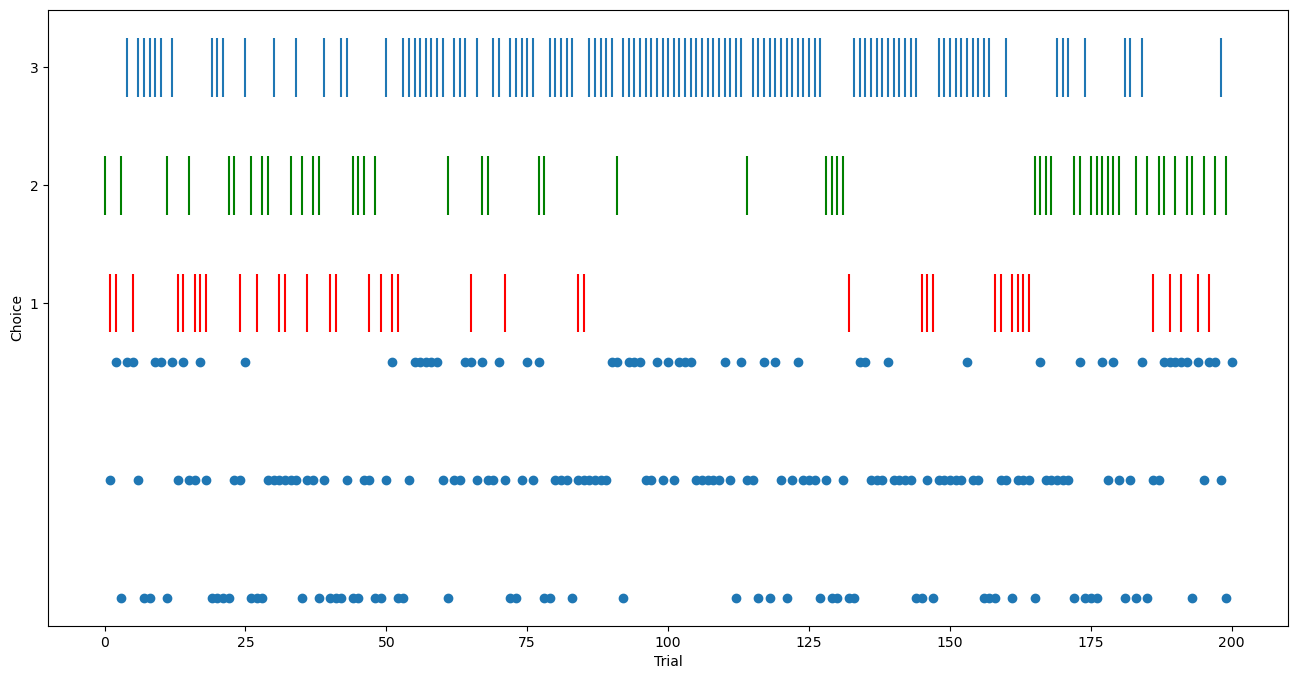

In [77]:
plt.figure(figsize=(16,8))

for i in range(0,len(choices)):
    
    if choices[i] == 1:
        plt.vlines(i,0.75,1.25,color='r')

    if choices[i] == 2:
        plt.vlines(i,1.75,2.25,color='g')
        
    if choices[i] == 3:
        plt.vlines(i,2.75,3.25)

plt.scatter(trials,np.array(rewards)-0.5)

plt.yticks([1,2,3]);
plt.ylabel('Choice')
plt.xlabel('Trial')

Clustering: